In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (20, 9)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os

In [37]:
df_alert = pd.read_csv("DB_video_19_EAR.csv")
counter = 1
maxear = []
minear = []
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
perclos_value=list()
df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
maxear.append(max(df_alert["EAR"]))
minear.append(min(df_alert["EAR"]))
number_of_blinks = []    
startframe = list()
endframe = list()
frameno=0
frame_no = []
counter = 0
newEAR = []
df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
for i in range(df_alert.shape[0]):
    #if (df["EAR"].iloc(i)) < (threshold):
    #if (df["EAR"].iloc(i)) < (threshold):
    
    if(df_alert["EAR"].iloc[i]==0):
        continue
    if df_alert["EAR_diff_LAR"].iloc[i]>=0.4:
            #print("HERE")
        newEAR.append(max(df_alert["EAR_L"].iloc[i],df_alert["EAR_R"].iloc[i])/2)
    else:
        newEAR.append(df_alert["EAR"].iloc[i])
    if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-4])*0.68) and i>3: #by 2 can be logic
        #get frameno, travell back to get start fram (i, previous frameno,-1)
        #end blink will get when EAR will reach to certain point
            #print(df_alert["EAR"].iloc[i])
            #print(df_alert["EAR"].iloc[i-4]*0.65)
        if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and df_alert["EMA"].iloc[i]>0.10):
            counter += 1
            if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                frame_no.append(df_alert["FN"].iloc[i-1])
        frameno = df_alert["FN"].iloc[i]
number_of_blinks.append(counter)
for frame in frame_no:
    EAR_at_frameno = df_alert.loc[df_alert["FN"] == frame,"EAR"].iloc[0]
    for i in range(frame,-1,-1):
        if (df_alert["EAR"].iloc[i] - EAR_at_frameno)  >= 0.1:
            startframe.append(df_alert["FN"].iloc[i])
            break
    for i in range(frame,df_alert.shape[0]):
        if(df_alert["EAR"].iloc[i] - EAR_at_frameno) >= 0.1:
            endframe.append(df_alert["FN"].iloc[i])
            break
for i in range(len(endframe)):
    row_data = ["myvideo2_EAR",startframe[i], frame_no[i], endframe[i]]
    oneseries = pd.Series(row_data,index= duration_frames.columns)
    duration_frames = duration_frames.append(oneseries,ignore_index=True)
print(frame_no)
frame_no.clear()
startframe.clear()
endframe.clear()
    #print("Number of blinks",num_of_blinks)
print(number_of_blinks)


[16, 97, 162, 165, 235, 297, 336, 477, 719, 755, 970, 1061, 1088, 1095, 1101, 1162]
[16]


In [38]:
duration_frames["blink_duration"] = duration_frames["End_Frame"] - duration_frames["Start_Frame"]
duration_frames

File_name Start_Frame Blink_Frame End_Frame blink_duration
0   myvideo2_EAR          17          16        17              0
1   myvideo2_EAR          96          97       102              6
2   myvideo2_EAR         160         162       171             11
3   myvideo2_EAR         160         165       171             11
4   myvideo2_EAR         233         235       242              9
5   myvideo2_EAR         296         297       310             14
6   myvideo2_EAR         333         336       339              6
7   myvideo2_EAR         475         477       482              7
8   myvideo2_EAR         717         719       726              9
9   myvideo2_EAR         752         755       824             72
10  myvideo2_EAR         969         970       974              5
11  myvideo2_EAR        1059        1061      1189            130
12  myvideo2_EAR        1086        1088      1115             29
13  myvideo2_EAR        1088        1095      1111             23
14  myvideo2_EAR        1088        1101      1112             24
15  myvideo2_EAR        1160        1162      1173             13

### With Multiple Files (27 video real enviroment)

In [145]:
path = f"./rcam/"
csvfiles = []
number_of_blinks = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
    #print(videofilename)
csvfiles.sort()
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []    

for x in csvfiles:
    df_alert = pd.read_csv(f"./rcam/{x}")
    if df_alert.empty:
        continue
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    #maxear.append(max(df_alert["EAR"]))
    #minear.append(min(df_alert["EAR"]))
    #startframe = list()
    #endframe = list()
    frameno=0
    frame_no = []
    #newEAR = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    for i in range(df_alert.shape[0]):
        #if (df["EAR"].iloc(i)) < (threshold):
        if(df_alert["EAR"].iloc[i]==0):
            continue
        #if df_alert["EAR_diff_LAR"].iloc[i]>=0.4:
            #print("HERE")
        #    newEAR.append(max(df_alert["EAR_L"].iloc[i],df_alert["EAR_R"].iloc[i])/2)
        #else:
        #    newEAR.append(df_alert["EAR"].iloc[i])
        if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-4])*0.68) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EMA"].iloc[i]>0.10):
                counter += 1
                if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                    frame_no.append(df_alert["FN"].iloc[i])
                else:
                    frame_no.append(df_alert["FN"].iloc[i-1])
            frameno = df_alert["FN"].iloc[i]
    number_of_blinks.append(counter)
    '''sf = 0 
    ef=0
    for frame in frame_no:
        EAR_at_frameno = df_alert.loc[df_alert["FN"] == frame,"EAR"].iloc[0]
        for i in range(frame,-1,-1):
            if (df_alert["EAR"].iloc[i] - EAR_at_frameno)  >= 0.1:
                startframe.append(df_alert["FN"].iloc[i-1])
                sf = df_alert["FN"].iloc[i-1]
                break
        for i in range(frame,df_alert.shape[0]):
            if(df_alert["EAR"].iloc[i] - EAR_at_frameno) >= 0.1:
                endframe.append(df_alert["FN"].iloc[i])
                ef = df_alert["FN"].iloc[i]
                break
        dict = {"File_name":x,"Start_Frame":sf,"Blink_Frame":frame, "End_Frame":ef}
        duration_frames =  duration_frames.append(dict, ignore_index = True)'''
    print("File Name: {}, : {}".format(x,frame_no))
    
    frame_no.clear()
    #startframe.clear()
    #endframe.clear()
print(number_of_blinks)


File Name: rcam_11_EAR.csv, : [300, 441, 455, 624, 641, 852, 876, 932, 955, 987, 1077, 1094, 1109]
File Name: rcam_1_EAR.csv, : [56, 109, 138, 154, 215, 232, 259, 312, 338, 398, 415, 497, 512, 827, 845, 866, 899, 910, 1166]
File Name: rcam_220903_131827_EAR.csv, : [91, 107, 389, 582, 600, 616, 852, 1171, 1189]
File Name: rcam_220903_131908_EAR.csv, : [83, 104, 293, 310, 488, 841, 899, 918, 977, 996, 1016, 1135]
File Name: rcam_220903_131948_EAR.csv, : [178, 419, 438, 494, 636, 775, 885, 957, 1045, 1102, 1114, 1157, 1195]
File Name: rcam_220903_132028_EAR.csv, : [19, 48, 108, 126, 163, 195, 216, 282, 374, 387, 452, 472, 715, 737, 906, 920]
File Name: rcam_220903_132108_EAR.csv, : [117, 119, 121, 383, 404, 439, 478, 728, 755, 774, 812, 830, 1078, 1124]
File Name: rcam_220903_132148_EAR.csv, : [56, 149, 169, 210, 482, 503, 519, 537, 692, 699, 753, 755, 1125, 1140]
File Name: rcam_220903_132229_EAR.csv, : [267, 280, 292, 309, 477, 497, 563, 603, 665, 741, 776, 784, 811, 835, 927, 938, 1015

In [31]:
duration_frames["blink_duration"] = duration_frames["End_Frame"] - duration_frames["Start_Frame"]
duration_frames[duration_frames["blink_duration"]>10]

File_name Start_Frame Blink_Frame End_Frame blink_duration
1   myvideo2_EAR          58          59        69             11
6   myvideo2_EAR         242         246       259             17
7   myvideo2_EAR         337         339       365             28
10  myvideo2_EAR         444         446       456             12

In [100]:
df_alert = pd.read_csv(f"myvideo17_EAR.csv")
counter = 1
maxear = []
minear = []
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
perclos_value=list()
df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
maxear.append(max(df_alert["EAR"]))
minear.append(min(df_alert["EAR"]))
number_of_blinks = []    
startframe = list()
endframe = list()
frameno=0
frame_no = []
counter = 0
newEAR = []
df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
df_alert.drop(df_alert[df_alert["EAR"]==0].index, inplace=True)
df_alert.drop(df_alert[df_alert["EAR_diff_LAR"]>0.4].index,inplace=True)
for i in range(df_alert.shape[0]):
    #if (df["EAR"].iloc(i)) < (threshold):
    #if (df["EAR"].iloc(i)) < (threshold):
    
    if(df_alert["EAR"].iloc[i]==0):
        continue
    if df_alert["EAR_diff_LAR"].iloc[i]>=0.4:
            #print("HERE")
        newEAR.append(max(df_alert["EAR_L"].iloc[i],df_alert["EAR_R"].iloc[i])/2)
    else:
        newEAR.append(df_alert["EAR"].iloc[i])
    if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-4])*0.70) and i>3: #by 2 can be logic
        #get frameno, travell back to get start fram (i, previous frameno,-1)
        #end blink will get when EAR will reach to certain point
            #print(df_alert["EAR"].iloc[i])
            #print(df_alert["EAR"].iloc[i-4]*0.65)
        if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and df_alert["EMA"].iloc[i]>0.10):
            counter += 1
            if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                frame_no.append(df_alert["FN"].iloc[i-1])
        frameno = df_alert["FN"].iloc[i]
number_of_blinks.append(counter)
for frame in frame_no:
    EAR_at_frameno = df_alert.loc[df_alert["FN"] == frame,"EAR"].iloc[0]
    for i in range(frame,-1,-1):
        if (df_alert["EAR"].iloc[i] - EAR_at_frameno)  >= 0.1:
            startframe.append(df_alert["FN"].iloc[i-1])
            break
    for i in range(frame,df_alert.shape[0]):
        if(df_alert["EAR"].iloc[i] - EAR_at_frameno) >= 0.05:
            endframe.append(df_alert["FN"].iloc[i])
            break
for i in range(len(endframe)):
    row_data = ["myvideo2_EAR",startframe[i], frame_no[i], endframe[i]]
    oneseries = pd.Series(row_data,index= duration_frames.columns)
    duration_frames = duration_frames.append(oneseries,ignore_index=True)
print(frame_no)
frame_no.clear()
startframe.clear()
endframe.clear()
    #print("Number of blinks",num_of_blinks)
print(number_of_blinks)


[8, 147, 184, 192, 208, 227, 239, 255, 273, 297, 387, 415, 661, 827, 1061, 1088, 1118]
[17]


In [ ]:
[8, 147, 185, 208, 239, 297, 302, 415, 827, 1061, 1088, 1119]
[12]
[8, 147, 183, 201, 208, 239, 273, 283, 297, 302, 398, 827, 1061, 1088, 1119]
[15] 

In [94]:
df_alert = pd.read_csv(f"myvideo17_EAR.csv")
counter = 1
maxear = []
minear = []
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
perclos_value=list()
df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
maxear.append(max(df_alert["EAR"]))
minear.append(min(df_alert["EAR"]))
number_of_blinks = []    
startframe = list()
endframe = list()
frameno=0
frame_no = []
counter = 0
newEAR = []
df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
df_alert["EAR_diff_LAR"].iloc[265:275]
for i in range(df_alert.shape[0]):    
    if df_alert["EAR_diff_LAR"].iloc[i]>=0.35:
            #print("HERE")
        newEAR.append(max(df_alert["EAR_L"].iloc[i],df_alert["EAR_R"].iloc[i])/2)
    else:
        newEAR.append(df_alert["EAR"].iloc[i])
print(newEAR[265:275])


[0.3963077176525954, 0.3632975150277792, 0.4539029222088327, 0.4455694651556802, 0.5213998756926923, 0.3685760794355479, 0.4723044636413059, 0.3698577463600302, 0.390571046357299, 0.390388356777221]


### Final Code

In [13]:
path = f"./trip1_new/"
csvfiles = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []    

for x in csvfiles:
    df_alert = pd.read_csv(f"./trip1_new/{x}")
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    frameno=0
    frame_no = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    for i in range(df_alert.shape[0]):
        if(df_alert["EAR"].iloc[i]==0):
            continue
        if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-4])*0.60) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EMA"].iloc[i]>0.10):
                counter += 1
                if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                    frame_no.append(df_alert["FN"].iloc[i])
                else:
                    frame_no.append(df_alert["FN"].iloc[i-1])
            frameno = df_alert["FN"].iloc[i]
    number_of_blinks.append(counter)
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
print(number_of_blinks)


File Name: 6_EAR.csv, : [10, 383, 385, 408, 735, 759, 806, 815, 825, 903, 925, 996, 998]
File Name: 7_EAR.csv, : [18, 39, 117, 351, 363, 372, 427, 434, 484, 509, 651, 653, 866, 1065, 1088]
File Name: 8_EAR.csv, : [95, 108, 220, 448, 451, 460, 514, 521, 535, 543, 582, 613, 671, 678, 686, 698, 723, 740, 972, 1083, 1090, 1101]
File Name: 9_EAR.csv, : [54, 99, 173, 511, 528, 620, 654, 988, 1014, 1022]
File Name: 11_EAR.csv, : [318, 401, 437, 961, 971, 974, 1006, 1059, 1065, 1079, 1081, 1083, 1109, 1133, 1148, 1189]
File Name: 12_EAR.csv, : [73, 159, 270, 289, 300]
File Name: 13_EAR.csv, : [43, 57, 132, 149, 259, 296, 413, 581, 598, 622, 714, 723, 746, 751, 773, 777, 794, 806, 817, 885, 889, 935, 946, 1011, 1051]
File Name: 14_EAR.csv, : [89]
File Name: 15_EAR.csv, : []
File Name: 16_EAR.csv, : [709]
File Name: 17_EAR.csv, : []
File Name: 18_EAR.csv, : [202, 516, 519, 528, 530, 548, 592]
File Name: 19_EAR.csv, : []
File Name: 20_EAR.csv, : [209, 336, 369, 402, 416, 472, 478, 492, 515, 518, 

In [14]:
sum(number_of_blinks)/len(number_of_blinks)

14.585365853658537

In [244]:
path = f"./trip4_dash_gs/"
csvfiles = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []
EAR_avg = []    

for x in csvfiles:
    df_alert = pd.read_csv(f"./trip4_dash_gs/{x}")
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    frameno=0
    frame_no = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    EAR_avg.append([df_alert["EAR"].mean()])
    for i in range(df_alert.shape[0]):
        if(df_alert["EAR"].iloc[i]==0):
            continue
        if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-4])*0.68) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EMA"].iloc[i]>0.10):
                counter += 1
                if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                    frame_no.append(df_alert["FN"].iloc[i])
                else:
                    frame_no.append(df_alert["FN"].iloc[i-1])
            frameno = df_alert["FN"].iloc[i]
    number_of_blinks.append(counter)
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
print(number_of_blinks)


File Name: 1_EAR.csv, : [21, 71, 195, 257]
File Name: 2_EAR.csv, : [339, 769, 772, 803, 1009, 1048, 1282, 1398, 1407]
File Name: 3_EAR.csv, : [274, 434, 444, 472, 637, 645, 682, 720, 788, 850, 890, 955, 972, 992, 1028, 1078, 1088, 1305, 1326]
File Name: 4_EAR.csv, : [26, 314, 647, 1090, 1495]
File Name: 5_EAR.csv, : [44, 55, 124, 147, 225, 251, 442, 449, 461, 484, 494, 516, 687, 689, 894, 971, 986, 995, 1030, 1037, 1461]
File Name: 6_EAR.csv, : [1145, 1327, 1356]
File Name: 7_EAR.csv, : [33]
File Name: 8_EAR.csv, : [1228, 1405, 1414]
File Name: 10_EAR.csv, : [72, 1291, 1308]
File Name: 11_EAR.csv, : [1111]
File Name: 12_EAR.csv, : [692, 754, 1327]
File Name: 13_EAR.csv, : []
File Name: 14_EAR.csv, : []
File Name: 15_EAR.csv, : []
File Name: 16_EAR.csv, : []
File Name: 17_EAR.csv, : [10]
File Name: 20_EAR.csv, : []
File Name: 21_EAR.csv, : []
File Name: 22_EAR.csv, : []
File Name: 23_EAR.csv, : []
File Name: 24_EAR.csv, : []
File Name: 25_EAR.csv, : []
File Name: 26_EAR.csv, : []
File N

In [14]:
RGB = [5, 10, 26, 5, 18, 5, 2, 5, 2, 1, 2, 4, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 4, 14, 4, 9]
GS =  [4,  9, 19, 5, 21, 3, 1, 3, 3, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,  9, 3, 6]

EAR_avg

[[0.24895700520340824],
 [0.24113533235070325],
 [0.22590685410842612],
 [0.23499652830599402],
 [0.22420504593624913],
 [0.20035871462860436],
 [0.017266034556698107],
 [0.04958213288652898],
 [0.024138490054463658],
 [0.06714784482787116],
 [0.09818306986829096],
 [0.03178788468019435],
 [0.06210867289868618],
 [0.016173265136938765],
 [0.01260120919450246],
 [0.001006906767331205],
 [0.08733695999330897],
 [0.00868120451395335],
 [0.006982020821896188],
 [0.03723875116767565],
 [0.0001949387032030772],
 [0.054219794664163705],
 [0.023261141768785826],
 [0.02226709964679943],
 [0.008149646457927982],
 [0.007651288555994462],
 [0.07156908213832627],
 [0.05897394527465961],
 [0.04020996908049303],
 [0.04223404202279639],
 [0.1453390443474957],
 [0.10570452392297341],
 [0.15717421137301751]]

In [129]:
path = f"./trip5_irvm/"
csvfiles = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []    
avr_EAR_video = []
for x in csvfiles:
    df_alert = pd.read_csv(f"./trip5_irvm/{x}")
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    frameno=0
    frame_no = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
    df_alert["EMA_L"] = df_alert["EAR_L"].ewm(8).mean()
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    for i in range(df_alert.shape[0]):
        if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-8])*0.70) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EMA"].iloc[i]>0.10):
                counter += 1
                if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                    frame_no.append(df_alert["FN"].iloc[i])
                else:
                    frame_no.append(df_alert["FN"].iloc[i-1])
            frameno = df_alert["FN"].iloc[i]
    number_of_blinks.append(counter)
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
    avr_EAR_video.append(df_alert["EAR"].mean())
print(number_of_blinks)



File Name: 1_EAR.csv, : [159, 746, 748, 765, 775, 791, 923, 1008, 1028]
File Name: 2_EAR.csv, : [36, 118, 382, 399, 430, 743, 814]
File Name: 3_EAR.csv, : [481, 483, 557, 1139, 1144, 1187]
File Name: 4_EAR.csv, : [255, 265, 547, 658, 663, 673]
File Name: 5_EAR.csv, : [39, 132, 209, 588, 824, 827, 898, 934, 992, 1048]
File Name: 6_EAR.csv, : [19]
File Name: 7_EAR.csv, : [359, 362, 1035, 1040]
File Name: 8_EAR.csv, : [860, 865, 1153]
File Name: 9_EAR.csv, : [118, 147, 162, 547, 552]
File Name: 10_EAR.csv, : [572, 599, 661, 664, 716]
File Name: 11_EAR.csv, : [17, 73, 386, 594, 1003]
File Name: 12_EAR.csv, : [143, 564, 683, 791, 830, 887, 1173, 1190]
File Name: 13_EAR.csv, : [79, 81, 115, 119, 182, 187, 296, 401, 403, 405, 607, 726]
File Name: 14_EAR.csv, : [178, 181, 499, 505, 991, 1071]
File Name: 15_EAR.csv, : [241, 248, 251, 253, 1072]
File Name: 16_EAR.csv, : [620, 934, 1053]
File Name: 17_EAR.csv, : [394, 968]
File Name: 18_EAR.csv, : [7, 843, 1084]
File Name: 19_EAR.csv, : [696]
Fil

In [130]:
sum(number_of_blinks)/len(number_of_blinks)

11.390070921985815

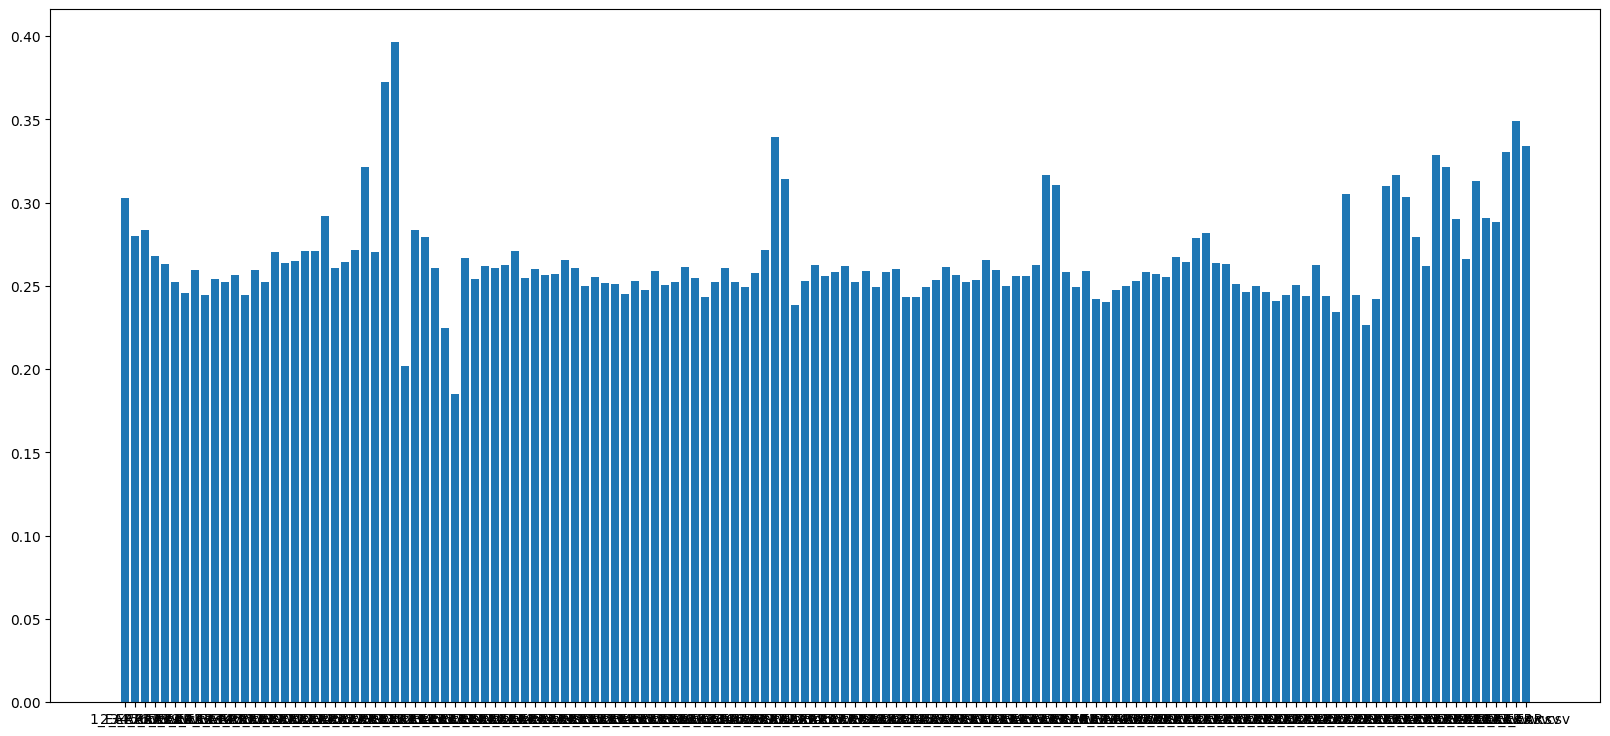

In [85]:
plt.bar(csvfiles,avr_EAR_video)
plt.show()

In [ ]:
path = f"./rcam/"
csvfiles = []
number_of_blinks = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
    #print(videofilename)
csvfiles.sort()
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []    

for x in csvfiles:
    df_alert = pd.read_csv(f"./rcam/{x}")
    if df_alert.empty:
        continue
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    #maxear.append(max(df_alert["EAR"]))
    #minear.append(min(df_alert["EAR"]))
    #startframe = list()
    #endframe = list()
    frameno=0
    frame_no = []
    #newEAR = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    for i in range(df_alert.shape[0]):
        #if (df["EAR"].iloc(i)) < (threshold):
        if(df_alert["EAR"].iloc[i]==0):
            continue
        #if df_alert["EAR_diff_LAR"].iloc[i]>=0.4:
            #print("HERE")
        #    newEAR.append(max(df_alert["EAR_L"].iloc[i],df_alert["EAR_R"].iloc[i])/2)
        #else:
        #    newEAR.append(df_alert["EAR"].iloc[i])
        if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-4])*0.68) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EMA"].iloc[i]>0.10):
                counter += 1
                if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                    frame_no.append(df_alert["FN"].iloc[i])
                else:
                    frame_no.append(df_alert["FN"].iloc[i-1])
            frameno = df_alert["FN"].iloc[i]
    number_of_blinks.append(counter)
    '''sf = 0 
    ef=0
    for frame in frame_no:
        EAR_at_frameno = df_alert.loc[df_alert["FN"] == frame,"EAR"].iloc[0]
        for i in range(frame,-1,-1):
            if (df_alert["EAR"].iloc[i] - EAR_at_frameno)  >= 0.1:
                startframe.append(df_alert["FN"].iloc[i-1])
                sf = df_alert["FN"].iloc[i-1]
                break
        for i in range(frame,df_alert.shape[0]):
            if(df_alert["EAR"].iloc[i] - EAR_at_frameno) >= 0.1:
                endframe.append(df_alert["FN"].iloc[i])
                ef = df_alert["FN"].iloc[i]
                break
        dict = {"File_name":x,"Start_Frame":sf,"Blink_Frame":frame, "End_Frame":ef}
        duration_frames =  duration_frames.append(dict, ignore_index = True)'''
    print("File Name: {}, : {}".format(x,frame_no))
    
    frame_no.clear()
    #startframe.clear()
    #endframe.clear()
print(number_of_blinks)


# EAR Analysis with mine morning data

In [151]:
df_alert = pd.read_csv("./trip5_irvm/17_EAR.csv")
counter = 1
maxear = []
minear = []
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
perclos_value=list()
blink_count=0
maxear.append(max(df_alert["EAR"]))
minear.append(min(df_alert["EAR"]))
number_of_blinks = []    
startframe = list()
endframe = list()
frameno=0
frame_no = []
counter = 0
newEAR = []
df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
df_alert["EMA_L"] = df_alert["EAR_L"].ewm(25).mean()
df_alert["EMA"] = df_alert["EAR"].ewm(25).mean()
for i in range(df_alert.shape[0]):
    if  df_alert["EAR"].iloc[i] <= ((df_alert["EMA"].iloc[i])) and i>3: #by 2 can be logic
        #get frameno, travell back to get start fram (i, previous frameno,-1)
        #end blink will get when EAR will reach to certain point
            #print(df_alert["EAR"].iloc[i])
            #print(df_alert["EAR"].iloc[i-4]*0.65)
        #if (df_alert["FN"].iloc[i] - 1 != frameno):
        counter += 1
        '''if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                frame_no.append(df_alert["FN"].iloc[i-1])
        frameno = df_alert["FN"].iloc[i]'''
    else:
        if(counter>25):
            blink_count+=1
            counter=0
number_of_blinks.append(blink_count)
'''for frame in frame_no:
    EAR_at_frameno = df_alert.loc[df_alert["FN"] == frame,"EAR"].iloc[0]
    for i in range(frame,-1,-1):
        if (df_alert["EAR"].iloc[i] - EAR_at_frameno)  >= 0.1:
            startframe.append(df_alert["FN"].iloc[i])
            break
    for i in range(frame,df_alert.shape[0]):
        if(df_alert["EAR"].iloc[i] - EAR_at_frameno) >= 0.1:
            endframe.append(df_alert["FN"].iloc[i])
            break'''
for i in range(len(endframe)):
    row_data = ["myvideo2_EAR",startframe[i], frame_no[i], endframe[i]]
    oneseries = pd.Series(row_data,index= duration_frames.columns)
    duration_frames = duration_frames.append(oneseries,ignore_index=True)
print(frame_no)
frame_no.clear()
startframe.clear()
endframe.clear()
    #print("Number of blinks",num_of_blinks)
print(number_of_blinks)


[]
[18]


In [144]:
df_alert[["EMA","EAR"]].iloc[610:650]

EMA       EAR
610  0.272390  0.260442
611  0.272871  0.276714
612  0.273739  0.280684
613  0.276221  0.296076
614  0.276798  0.281414
615  0.276131  0.270793
616  0.277298  0.286637
617  0.276843  0.273207
618  0.278361  0.290506
619  0.280249  0.295352
620  0.279981  0.277833
621  0.279793  0.278289
622  0.280072  0.282308
623  0.280229  0.281486
624  0.279060  0.269708
625  0.277880  0.268436
626  0.277111  0.270958
627  0.276895  0.275166
628  0.275784  0.266903
629  0.275238  0.270868
630  0.274332  0.267080
631  0.273800  0.269550
632  0.273715  0.273036
633  0.273981  0.276104
634  0.274071  0.274789
635  0.273103  0.265366
636  0.269551  0.241131
637  0.265318  0.231458
638  0.263592  0.249783
639  0.264440  0.271225
640  0.258370  0.209809
641  0.253969  0.218755
642  0.254148  0.255584
643  0.255041  0.262182
644  0.256671  0.269712
645  0.258413  0.272346
646  0.260020  0.272878
647  0.261505  0.273391
648  0.262478  0.270259
649  0.264000  0.276179

In [145]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=1)


'''fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["EAR_L"],  name = "EAR", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["EMA_L"],  name = "EMA", mode = "lines"),
    row=1, col=1
)'''
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["EAR"],  name = "EAR", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["EMA"],  name = "EMA", mode = "lines"),
    row=1, col=1
)

fig.update_layout(height=450, width=1550, title_text="EAR with EMA")
fig.show()

In [ ]:
[159, 748, 750, 762, 764, 790, 921, 1029]
[8]
[646, 677, 742, 780, 790, 791, 935, 960]
[8]

In [94]:
path = f"./trip5_is/"
csvfiles = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []    
avr_EAR_video = []
for x in csvfiles:
    df_alert = pd.read_csv(f"./trip5_is/{x}")
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    frameno=0
    frame_no = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
    df_alert["EMA_L"] = df_alert["EAR_L"].ewm(8).mean()
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    for i in range(df_alert.shape[0]):
        if  df_alert["EAR"].iloc[i] <= ((df_alert["EAR"].iloc[i-4])*0.70) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            if (df_alert["FN"].iloc[i] - 1 != frameno and df_alert["EMA"].iloc[i]>0.10):
                counter += 1
                if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                    frame_no.append(df_alert["FN"].iloc[i])
                else:
                    frame_no.append(df_alert["FN"].iloc[i-1])
            frameno = df_alert["FN"].iloc[i]
    number_of_blinks.append(counter)
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
    avr_EAR_video.append(df_alert["EAR"].mean())
print(number_of_blinks)



File Name: 1_EAR.csv, : [20]
File Name: 2_EAR.csv, : [38]
File Name: 3_EAR.csv, : [77, 153, 178, 225, 241, 262, 269, 322, 330, 341, 364, 391, 403, 426, 429, 516, 537, 651, 735, 853, 871, 881, 920, 962, 971, 980, 1009, 1118]
File Name: 4_EAR.csv, : [20, 57, 62, 69, 186, 195, 215, 215, 234, 249, 251, 272, 280, 295, 312, 323, 343, 361, 398, 465, 489, 542, 565, 601, 635, 667, 713, 723, 744, 749, 770, 783, 805, 833, 849, 866, 874, 876, 879, 904, 905, 912, 919, 926, 939, 940, 948, 978]
File Name: 5_EAR.csv, : [38, 67, 79, 194, 206, 249, 266, 273, 292, 306, 338, 349, 355, 454, 481, 500, 514, 564, 578, 602, 625, 688, 704, 718, 726, 739, 750, 762, 774, 792, 805, 815, 831, 866, 889, 908, 975, 978, 999, 1017, 1051, 1074, 1099, 1130, 1148, 1172, 1185]
File Name: 6_EAR.csv, : [22, 79, 119, 146, 167, 203, 221, 246, 293, 309, 322, 332, 356, 382, 402, 472, 490, 505, 525, 558, 578, 615, 644, 696, 741, 780, 788, 825, 858, 910, 948, 958, 981, 1011, 1036, 1061, 1093, 1115, 1128, 1137, 1149, 1162, 1195]
Fi

In [96]:
sum(number_of_blinks)/len(number_of_blinks) / 2

14.755952380952381

In [233]:
path = f"./trip5_irvm/"
csvfiles = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []    
avr_EAR_video = []
for x in csvfiles:
    df_alert = pd.read_csv(f"./trip5_irvm/{x}")
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    frameno=0
    prev_frame=0
    blink_count=0
    frame_no = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
    df_alert["EMA_L"] = df_alert["EAR_L"].ewm(8).mean()
    df_alert["EMA"] = df_alert["EAR"].ewm(30).mean()
    for i in range(df_alert.shape[0]):
        if  df_alert["EAR_L"].iloc[i] <= ((df_alert["EMA_L"].iloc[i-4]*0.85)):#*0.70) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            frameno = df_alert["FN"].iloc[i]
            if (df_alert["EAR_L"].iloc[i]<df_alert["EAR_L"].iloc[i-1]):
                #if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                #frame_no.append(df_alert["FN"].iloc[i])
                prev_frame = frameno
                #counter+=1
            else:
                counter+=1
                frame_no.append(prev_frame)
    number_of_blinks.append(counter)
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
    avr_EAR_video.append(df_alert["EAR"].mean())
print(number_of_blinks)



File Name: 1_EAR.csv, : [230, 561, 561, 667, 764, 764, 779, 790, 838, 892, 1004, 1007]
File Name: 2_EAR.csv, : [10, 400, 431, 431, 434, 436, 577, 711, 711, 714, 853]
File Name: 3_EAR.csv, : [602, 686, 896, 956, 978, 1136, 1136, 1156]
File Name: 4_EAR.csv, : [50, 50, 50, 223, 223, 223, 227, 430, 597, 599, 599, 599, 674, 674, 705, 847, 873]
File Name: 5_EAR.csv, : [48, 50, 131, 133, 376, 376, 383, 385, 718, 781, 809, 854, 967, 992, 994, 1096, 1105, 1105]
File Name: 6_EAR.csv, : [81, 86, 428, 428, 428]
File Name: 7_EAR.csv, : [206, 321, 362, 1041, 1078, 1081, 1083]
File Name: 8_EAR.csv, : [859, 1071]
File Name: 9_EAR.csv, : [185, 548, 889, 892, 892, 1100, 1142]
File Name: 10_EAR.csv, : [425, 665, 1066, 1066, 1144, 1144, 1148]
File Name: 11_EAR.csv, : [29, 29, 576, 576, 655, 685, 1067, 1142, 1189, 1192]
File Name: 12_EAR.csv, : [128, 130, 143, 260, 260, 482, 511, 630, 833, 887, 917, 917]
File Name: 13_EAR.csv, : [79, 79, 99, 101, 726, 863, 998, 1139, 1139, 1145, 1145, 1149, 1151]
File Name

In [234]:
(sum(number_of_blinks)/len(number_of_blinks))/2

8.567375886524824

In [214]:
path = f"./trip5_is/"
csvfiles = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
number_of_blinks = []    
avr_EAR_video = []
for x in csvfiles:
    df_alert = pd.read_csv(f"./trip5_is/{x}")
    df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
    frameno=0
    prev_frame=0
    blink_count=0
    frame_no = []
    counter = 0
    df_alert["EAR_diff_LAR"] = abs(df_alert["EAR_L"]-df_alert["EAR_R"])
    df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
    df_alert["EMA_L"] = df_alert["EAR_L"].ewm(4).mean()
    df_alert["EMA"] = df_alert["EAR"].ewm(30).mean()
    for i in range(df_alert.shape[0]):
        if  df_alert["EAR_L"].iloc[i] <= ((df_alert["EAR_L"].iloc[i-4]*0.60)):#*0.70) and df_alert["EAR_diff_LAR"].iloc[i]<0.35 and i>3: 
            frameno = df_alert["FN"].iloc[i]
            if (df_alert["EAR_L"].iloc[i]<df_alert["EAR_L"].iloc[i-1]):
                #if df_alert["EAR"].iloc[i] < df_alert["EAR"].iloc[i-1]:
                #frame_no.append(df_alert["FN"].iloc[i])
                prev_frame = frameno
                #counter+=1
            else:
                counter+=1
                frame_no.append(prev_frame)
    number_of_blinks.append(counter)
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
    avr_EAR_video.append(df_alert["EAR"].mean())
print("\n\n-----------------------No of blinks---------------------")
print(number_of_blinks)




File Name: 1_EAR.csv, : []
File Name: 2_EAR.csv, : [38]
File Name: 3_EAR.csv, : [153, 153, 178, 241, 269, 269, 269, 341, 341, 373, 391, 459, 459, 474, 474, 517, 558, 610, 628, 628, 674, 724, 772, 772, 855, 919, 919, 962, 980, 1009, 1097, 1097]
File Name: 4_EAR.csv, : [20, 20, 62, 62, 69, 213, 280, 280, 336, 344, 344, 362, 362, 399, 399, 635, 723, 785, 785, 805, 833, 867, 867, 913, 939, 948, 948, 948]
File Name: 5_EAR.csv, : [97, 267, 272, 272, 272, 306, 515, 564, 718, 726, 831, 1074, 1172, 1185]
File Name: 6_EAR.csv, : [79, 113, 167, 246, 293, 324, 332, 402, 472, 578, 788, 858, 1122, 1122, 1137]
File Name: 7_EAR.csv, : [259, 946, 1000, 1042]
File Name: 8_EAR.csv, : [39, 571, 584, 846, 1035]
File Name: 9_EAR.csv, : [137, 351, 398, 478, 552, 552, 568, 793, 816, 875, 983, 1005, 1020, 1162]
File Name: 10_EAR.csv, : [183, 307, 383, 410, 639, 639, 993, 1029, 1124]
File Name: 11_EAR.csv, : [82, 284, 361, 553, 1190]
File Name: 12_EAR.csv, : [12, 54, 65, 100, 100, 119, 150, 352, 638, 659]
File 

In [210]:
df_alert

FN     EAR_L     EAR_R       EAR                       P1  \
0        1  0.158921  0.094339  0.126630  [0.61924326 0.4547337 ]   
1        2  0.158590  0.109272  0.133931  [0.61072838 0.45322946]   
2        3  0.288853  0.264327  0.276590  [0.59805322 0.45158455]   
3        4  0.332992  0.287466  0.310229  [0.5885129  0.44527552]   
4        5  0.346567  0.296979  0.321773  [0.58370388 0.44018662]   
...    ...       ...       ...       ...                      ...   
1184  1185  0.228312  0.334896  0.281604  [0.46659145 0.41231006]   
1185  1186  0.205271  0.337791  0.271531  [0.44920996 0.42156982]   
1186  1187  0.200341  0.325307  0.262824  [0.43684345 0.43387979]   
1188  1189  0.283180  0.506963  0.395072  [0.34669158 0.45852518]   
1189  1190  0.303820  0.555225  0.429522    [0.3337391 0.4695316]   

                           P2                       P3  \
0     [0.63618815 0.45428056]  [0.65327895 0.45400506]   
1     [0.62725759 0.45275348]  [0.64428979 0.45229587]   
2     [0.61703193 0.44009873]  [0.63557506 0.43919808]   
3     [0.60839581 0.43172416]  [0.62817001 0.43108034]   
4     [0.60281217 0.42619267]  [0.62198192 0.42619154]   
...                       ...                      ...   
1184  [0.48196876 0.40675199]  [0.49721536 0.40825212]   
1185  [0.46076161 0.41642693]  [0.47398469 0.41746187]   
1186  [0.44921696 0.42859301]  [0.46225259 0.42845359]   
1188  [0.35410467 0.45448136]  [0.36414203 0.45545518]   
1189  [0.33963794 0.46468782]  [0.34903675 0.46394888]   

                           P4                       P5  \
0     [0.66275895 0.45089993]  [0.64709938 0.45795906]   
1     [0.65409428 0.44873357]  [0.63787633 0.45580804]   
2     [0.64399767 0.44168037]  [0.63039589 0.45180359]   
3     [0.63667768 0.43521044]  [0.62217045 0.44646773]   
4     [0.63122129 0.43061137]  [0.61568457 0.44190645]   
...                       ...                      ...   
1184  [0.50820422 0.41244712]  [0.49276641 0.41651222]   
1185  [0.48457891 0.42054269]  [0.47110972 0.42387784]   
1186  [0.47278598 0.43139401]  [0.4598161  0.43518677]   
1188  [0.37340242 0.45782307]  [0.36063373 0.46207237]   
1189  [0.35809508 0.46573338]  [0.34698898 0.47115901]   

                           P6      TIMESTAMP       EMA  EAR_diff_LAR     EMA_L  
0     [0.63014495 0.45680261]  1663677059111  0.126630      0.064582  0.158921  
1     [0.62105173 0.45474097]  1663677059133  0.130340      0.049318  0.158737  
2     [0.6117636  0.45255446]  1663677059155  0.180697      0.024526  0.212063  
3     [0.60261029 0.44691393]  1663677059174  0.214690      0.045526  0.253028  
4     [0.5969516  0.44179672]  1663677059198  0.237533      0.049588  0.280854  
...                       ...            ...       ...           ...       ...  
1184  [0.47838733 0.41567987]  1663677083649  0.186921      0.106584  0.152817  
1185  [0.45878828 0.42365846]  1663677083670  0.189651      0.132519  0.163308  
1186  [0.44693995 0.43550295]  1663677083696  0.192011      0.124967  0.170714  
1188  [0.35158518 0.46169767]  1663677083733  0.198561      0.223784  0.193207  
1189    [0.3386206 0.4721016]  1663677083752  0.206012      0.251405  0.215330  

[1164 rows x 14 columns]

In [211]:
newEAR=[]
for i in range(df_alert.shape[0]):
    if df_alert["EAR_diff_LAR"].iloc[i] >=0.35:
        newEAR.append(min(df_alert["EAR_L"].iloc[i],df_alert["EAR_R"].iloc[i]))
    else:
        newEAR.append(df_alert["EAR"].iloc[i])

In [215]:
print(newEAR[30:40])
testDF = pd.DataFrame(newEAR)

[0.338354215851638, 0.3696572284116597, 0.3461843215564386, 0.3654324253085861, 0.2015630267578027, 0.1991965309526515, 0.1144976582875699, 0.1196202447017305, 0.1406815006228164, 0.2900813283112086]


In [220]:
testDF.ewm(4).mean().head(30)

0
0   0.126630
1   0.130686
2   0.190483
3   0.231047
4   0.258036
5   0.282627
6   0.297154
7   0.304440
8   0.311494
9   0.317483
10  0.321229
11  0.285358
12  0.249446
13  0.223235
14  0.205289
15  0.188613
16  0.176427
17  0.166221
18  0.155088
19  0.161270
20  0.210667
21  0.232372
22  0.249984
23  0.264971
24  0.273678
25  0.286135
26  0.300247
27  0.318657
28  0.330996
29  0.336143

In [356]:
number_of_blinks=[]
df_alert = pd.read_csv(f"DB_video_22_EAR.csv")
#df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
#df_alert["NewEMA"] = df_alert["NewEAR"].ewm(8).mean()
frameno=0
prev_frame=0
frame_no = []
counter = 0
df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
for i in range(df_alert.shape[0]):
    if df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-4]*0.70:
        frameno = df_alert["FN"].iloc[i]
        if (df_alert["NewEAR"].iloc[i]>df_alert["NewEAR"].iloc[i-1]): 
            counter+=1
            frameno = frameno-1
            frame_no.append(frameno)
        if len(frame_no)>2 and frame_no[-1] - frame_no[-2] == 1:
            counter-=1
            frame_no.pop()    
            #print("else block",prev_frame)
        #frame_no.append(prev_frame)            
number_of_blinks.append(counter)
print("File Name: {}, : {}".format(x,frame_no))
frame_no.clear()
print("\n\n-----------------------No of blinks---------------------")
print(number_of_blinks)




File Name: rcam_220903_133434_EAR.csv, : [67, 123, 164, 421, 515, 579, 682, 750, 784, 786, 833, 849, 868, 934, 1039]


-----------------------No of blinks---------------------
[15]


In [357]:
number_of_blinks=[]
df_alert = pd.read_csv(f"DB_video_22_EAR.csv")
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()
frame_no = []
df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85:
        if len(frame_no) ==0 or (df_alert["FN"].iloc[i] - frame_no[-1] != 1):
            frame_no.append(df_alert["FN"].iloc[i])
        else:
            if  (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                frame_no[-1] = df_alert["FN"].iloc[i]           
number_of_blinks.append(len(frame_no))
print("\n\n-----------------------No of blinks---------------------")
print(number_of_blinks)
print("File Name: {}, : {}".format(x,frame_no))



-----------------------No of blinks---------------------
[18]
File Name: rcam_220903_133434_EAR.csv, : [70, 125, 166, 249, 425, 517, 581, 684, 754, 787, 837, 853, 870, 936, 990, 1040, 1082, 1090]


File Name: 36_EAR.csv, : [67, 123, 164, 421, 515, 579, 682, 750, 784, 786, 833, 849, 868, 934, 1039] : 15 blinks
File Name: 36_EAR.csv, : [70, 125, 166, 249, 425, 517, 581, 684, 754, 787, 837, 853, 870, 936, 990, 1040, 1082, 1090] : 18 blinks

### Rcam video (27 videos) based on new logic

In [346]:

path = f"./rcam/"
csvfiles = []
number_of_blinks = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
    #print(videofilename)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
perclos_value=list()
for x in csvfiles:
    df_alert = pd.read_csv(f"./rcam/{x}")
    df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()
    frame_no = []
    df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
    for i in range(df_alert.shape[0]):
        if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85:
            if len(frame_no) ==0 or (df_alert["FN"].iloc[i] - frame_no[-1] != 1):
                frame_no.append(df_alert["FN"].iloc[i])
            else:
                if  (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                    frame_no[-1] = df_alert["FN"].iloc[i]           
    number_of_blinks.append(len(frame_no))
    print("\n\n-----------------------No of blinks---------------------")
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
print(number_of_blinks)




-----------------------No of blinks---------------------
File Name: rcam_1_EAR.csv, : [61, 113, 141, 157, 217, 237, 263, 316, 342, 402, 404, 420, 501, 517, 832, 849, 851, 871, 903, 1169, 1171]


-----------------------No of blinks---------------------
File Name: rcam_2_EAR.csv, : [2, 4, 305, 444, 460, 628, 647, 849, 879, 935, 958, 980, 1080, 1097]


-----------------------No of blinks---------------------
File Name: rcam_220903_131827_EAR.csv, : [93, 95, 111, 113, 392, 586, 605, 620, 856, 1176, 1195]


-----------------------No of blinks---------------------
File Name: rcam_220903_131908_EAR.csv, : [86, 88, 101, 297, 314, 492, 844, 904, 922, 979, 997, 1022, 1139, 1141]


-----------------------No of blinks---------------------
File Name: rcam_220903_131948_EAR.csv, : [182, 184, 422, 442, 497, 639, 780, 887, 960, 1048, 1104, 1118, 1159, 1198]


-----------------------No of blinks---------------------
File Name: rcam_220903_132028_EAR.csv, : [1, 3, 54, 110, 127, 129, 166, 201, 287, 375

In [355]:
path = f"./rcam/"
csvfiles = []
number_of_blinks = []
for x in os.listdir(path):
    if x.endswith(".csv"):
            csvfiles.append(x)
    #print(videofilename)
csvfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
duration_frames = pd.DataFrame(columns=["File_name","Start_Frame","Blink_Frame", "End_Frame"])
perclos_value=list()
number_of_blinks=[]
frameno, prev_frame=0, 0
frame_no = []
df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
for x in csvfiles:
    df_alert = pd.read_csv(f"./rcam/{x}")
    df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()
    frame_no = []
    counter=0
    df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
    for i in range(df_alert.shape[0]):
        if df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-4]*0.70:
            frameno = df_alert["FN"].iloc[i]
            if (df_alert["NewEAR"].iloc[i]>df_alert["NewEAR"].iloc[i-1]): 
                counter+=1
                frameno = frameno-1
                frame_no.append(frameno)
            if len(frame_no)>2 and frame_no[-1] - frame_no[-2] == 1:
                counter-=1
                frame_no.pop()    
            #print("else block",prev_frame)
        #frame_no.append(prev_frame)            
    number_of_blinks.append(counter)
    print("File Name: {}, : {}".format(x,frame_no))
    frame_no.clear()
print("\n\n-----------------------No of blinks---------------------")
print(number_of_blinks)

File Name: rcam_1_EAR.csv, : [57, 58, 111, 140, 156, 233, 261, 313, 339, 399, 500, 514, 829, 847, 868, 899, 901, 1167]
File Name: rcam_2_EAR.csv, : [301, 303, 443, 455, 457, 627, 642, 847, 853, 872, 878, 955, 966, 977, 979, 1078, 1095]
File Name: rcam_220903_131827_EAR.csv, : [108, 110, 391, 584, 602, 617, 854, 1173, 1191]
File Name: rcam_220903_131908_EAR.csv, : [85, 105, 295, 311, 313, 490, 843, 901, 920, 978, 1016, 1138]
File Name: rcam_220903_131948_EAR.csv, : [179, 181, 421, 440, 496, 637, 778, 884, 958, 1046, 1102, 1114, 1157, 1195]
File Name: rcam_220903_132028_EAR.csv, : [49, 108, 126, 164, 196, 282, 285, 389, 454, 718, 740]
File Name: rcam_220903_132108_EAR.csv, : [385, 406, 440, 728, 730, 760, 777, 831, 1079, 1083, 1126]
File Name: rcam_220903_132148_EAR.csv, : [56, 57, 170, 212, 483, 505, 520, 539, 744, 851, 862, 1142]
File Name: rcam_220903_132229_EAR.csv, : [269, 281, 292, 294, 478, 564, 604, 667, 741, 743, 777, 784, 814, 837, 928, 938, 1016, 1186, 1188]
File Name: rcam_22

In [372]:
path = f"../data/Dataset/"
allfiles = []
file_name=[]
for root, direct, files in os.walk(path):
    for file in files:
        allfiles.append(os.path.join(root,file))
allfiles.sort(key = lambda f: int(''.join(filter(str.isdigit, f))))
print(allfiles)
for name in allfiles:
    print(name.split("/")[-2]+"_"+name.split("/")[-1].split(".")[0])

['../data/Dataset/Fold1_part1/01/0.mov', '../data/Dataset/Fold1_part1/01/5.mov', '../data/Dataset/Fold1_part1/02/0.mov', '../data/Dataset/Fold1_part1/02/5.MOV', '../data/Dataset/Fold1_part1/03/0.MOV', '../data/Dataset/Fold1_part1/03/5.mov', '../data/Dataset/Fold1_part1/05/0.MOV', '../data/Dataset/Fold1_part1/05/5.MOV', '../data/Dataset/Fold1_part2/10/0.MOV', '../data/Dataset/Fold1_part2/10/5.MOV', '../data/Dataset/Fold2_part1/16/0.MOV', '../data/Dataset/Fold2_part1/16/5.MOV', '../data/Dataset/Fold2_part1/18/0.mov', '../data/Dataset/Fold2_part1/18/5.mov', '../data/Dataset/Fold2_part2/19/0.MOV', '../data/Dataset/Fold2_part2/19/5.MOV', '../data/Dataset/Fold2_part2/20/5.MOV', '../data/Dataset/Fold2_part2/21/0.MOV', '../data/Dataset/Fold2_part2/21/5.MOV', '../data/Dataset/Fold2_part2/22/0.MOV', '../data/Dataset/Fold2_part2/22/5.MOV', '../data/Dataset/Fold3_part1/27/0.MOV', '../data/Dataset/Fold3_part1/27/5.MOV', '../data/Dataset/Fold3_part1/28/0.MOV', '../data/Dataset/Fold3_part1/28/5.MOV',

In [104]:
number_of_blinks=[]
frameno=0
frame_no = []
counter = 0
df_alert = pd.read_csv(f"Dataset/01_0_EAR.csv")

df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85:
        if len(frame_no) ==0 or (df_alert["FN"].iloc[i] - frame_no[-1] >2 ):
            frame_no.append(df_alert["FN"].iloc[i])
        else:
            if  (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                frame_no[-1] = df_alert["FN"].iloc[i]           
number_of_blinks.append(len(frame_no))
print("\n\n-----------------------No of blinks---------------------")
print("File Name: {}, : {}".format("01_0_EAR.csv",frame_no))
frame_no.clear()
print(number_of_blinks)




-----------------------No of blinks---------------------
File Name: 01_0_EAR.csv, : [39, 92, 107, 267, 300, 335, 374, 590, 859, 963, 1002, 1161, 1182, 1461, 1608, 1660, 1702, 1743, 1798, 2220, 2314, 2367, 2428, 2452, 2494, 2515, 2543, 2701, 2736, 2851, 3140, 3295, 3504, 3641, 3739, 3797, 3965, 4050, 4215, 4279, 4293, 4309, 4365, 4484, 4520, 4592, 4697, 4727, 4768, 4811, 4965, 4991, 5029, 5199, 5243, 5324, 5359, 5394, 5417, 5442, 5469, 5490, 5516, 5556, 5586, 5603, 5683, 5717, 5738, 5813, 5848, 6216, 6363, 6454, 6546, 6626, 6659, 6717, 6796, 6964, 7020, 7051, 7321, 7365, 7430, 7457, 7486, 7511, 7549, 7608, 7637, 7694, 7726, 7748, 7759, 7785, 8053, 8160, 9121, 9226, 9645, 9858, 9881, 9888, 9910, 9950, 9977, 10013, 10078, 10269, 10303, 10349, 10415, 10454, 10544, 10576, 10617, 10636, 10681, 10697, 10712, 10744, 10779, 10823, 10854, 10963, 10989, 11005, 11084, 11125, 11176, 11246, 11259, 11385, 11445, 11524, 11577, 11598, 11628, 11653, 11681, 11707, 11801, 11872, 11965, 12004, 12030, 121

In [81]:
number_of_blinks=[]
df_alert = pd.read_csv(f"Dataset/01_0_EAR.csv")
#df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
#df_alert["NewEMA"] = df_alert["NewEAR"].ewm(8).mean()
frameno=0
prev_frame=0
frame_no = []
counter = 0
df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
for i in range(df_alert.shape[0]):
    if df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-4]*0.70:
        frameno = df_alert["FN"].iloc[i]
        if (df_alert["NewEAR"].iloc[i]>df_alert["NewEAR"].iloc[i-1]): 
            counter+=1
            frameno = frameno-1
            frame_no.append(frameno)
        if len(frame_no)>2 and frame_no[-1] - frame_no[-2] == 1:
            counter-=1
            frame_no.pop()    
            #print("else block",prev_frame)
        #frame_no.append(prev_frame)            
number_of_blinks.append(counter)
print("File Name: {}, : {}".format("same_file",frame_no))
frame_no.clear()
print("\n\n-----------------------No of blinks---------------------")
print(number_of_blinks)

File Name: same_file, : [38, 91, 105, 333, 372, 588, 961, 1000, 1181, 1606, 1658, 1700, 1741, 1796, 2219, 2312, 2365, 2426, 2450, 2492, 2541, 2700, 2849, 3503, 3639, 3736, 3795, 3963, 4048, 4213, 4272, 4277, 4291, 4308, 4364, 4518, 4589, 4695, 4809, 4963, 4989, 5195, 5321, 5467, 5489, 5514, 5584, 5601, 5715, 5736, 5811, 5846, 6215, 6540, 6624, 6656, 6716, 6794, 7049, 7319, 7428, 7455, 7485, 7509, 7547, 7636, 7746, 7757, 7784, 8090, 9856, 9879, 9886, 9909, 9948, 9975, 10076, 10268, 10301, 10347, 10413, 10452, 10542, 10574, 10634, 10696, 10710, 10742, 10778, 10821, 10987, 11003, 11083, 11175, 11244, 11257, 11384, 11522, 11575, 11596, 11626, 11651, 11679, 11799, 12002, 12180, 12234, 12246, 12288, 12322, 12361, 12419, 12655, 12682, 12720, 12776, 12795, 12832, 12881, 12934, 13122, 13176, 13279, 13509, 13556, 13604, 13980, 14005, 14102, 14619, 14659, 15272, 15327, 15370, 15530, 15586, 16156, 16331, 16387, 16498, 16515, 16658, 16693, 16722, 16854, 16911, 16938, 17056, 17086, 17228, 17489, 176

In [105]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=1)


fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["NewEAR"],  name = "EAR", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["NewEMA"],  name = "EMA", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = [np.mean(df_alert["NewEMA"])] * df_alert.shape[0],  name = "EMA_MEAN", mode = "lines"),
    row=1, col=1
)

fig.update_layout(height=450, width=1550, title_text="EAR with EMA")
fig.show()

In [102]:
number_of_blinks=[]
frameno=0
frame_no = []
counter = 0
df_alert = pd.read_csv(f"Dataset/01_5_EAR.csv")

df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85:
        if len(frame_no) ==0 or (df_alert["FN"].iloc[i] - frame_no[-1] >2 ):
            frame_no.append(df_alert["FN"].iloc[i])
        else:
            if  (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                frame_no[-1] = df_alert["FN"].iloc[i]           
number_of_blinks.append(len(frame_no))
print("\n\n-----------------------No of blinks---------------------")
print("File Name: {}, : {}".format("01_0_EAR.csv",frame_no))
frame_no.clear()
print(number_of_blinks)




-----------------------No of blinks---------------------
File Name: 01_0_EAR.csv, : [2, 64, 212, 403, 438, 604, 703, 745, 786, 814, 851, 922, 1276, 1351, 1451, 1622, 1684, 1728, 1942, 2025, 2204, 2354, 2431, 2460, 2506, 2606, 2937, 3016, 3189, 3276, 3374, 3536, 3567, 3602, 3627, 3667, 3900, 3930, 3987, 4008, 4075, 4160, 4223, 4347, 4481, 4850, 4978, 5342, 5533, 5634, 6168, 6391, 6446, 6474, 6513, 6562, 6749, 6920, 7010, 7055, 7090, 7178, 7219, 7247, 7316, 7492, 7531, 7792, 7861, 8073, 8107, 8140, 8229, 8260, 8574, 8741, 8776, 8803, 8937, 9204, 9323, 9726, 9934, 10224, 10233, 10278, 10322, 10414, 10444, 10516, 10616, 10680, 10885, 10937, 11208, 11263, 11355, 11612, 11693, 11735, 11793, 11814, 11855, 11888, 11938, 11973, 12005, 12068, 12090, 12187, 12241, 12306, 12347, 12377, 12446, 12842, 12967, 12998, 13087, 13159, 13357, 13393, 13432, 13476, 13506, 13535, 13690, 13816, 13882, 13956, 13985, 14017, 14065, 14112, 14305, 14351, 14403, 14428, 14469, 14527, 14542, 14576, 14622, 14862, 149

In [88]:
number_of_blinks=[]
df_alert = pd.read_csv(f"Dataset/01_5_EAR.csv")
#df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
#df_alert["NewEMA"] = df_alert["NewEAR"].ewm(8).mean()
frameno=0
prev_frame=0
frame_no = []
counter = 0
df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
for i in range(df_alert.shape[0]):
    if df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-4]*0.70:
        frameno = df_alert["FN"].iloc[i]
        if (df_alert["NewEAR"].iloc[i]>df_alert["NewEAR"].iloc[i-1]): 
            counter+=1
            frameno = frameno-1
            frame_no.append(frameno)
        if len(frame_no)>2 and frame_no[-1] - frame_no[-2] == 1:
            counter-=1
            frame_no.pop()    
            #print("else block",prev_frame)
        #frame_no.append(prev_frame)            
number_of_blinks.append(counter)
print("File Name: {}, : {}".format("same_file",frame_no))
frame_no.clear()
print("\n\n-----------------------No of blinks---------------------")
print(number_of_blinks)

File Name: same_file, : [63, 210, 402, 701, 743, 784, 849, 1275, 1350, 1450, 1725, 1940, 2023, 2202, 2429, 2495, 2935, 3014, 3186, 3274, 3372, 3533, 3565, 3600, 3624, 3898, 3927, 3985, 4005, 4158, 4220, 4345, 4479, 4849, 5532, 6166, 6210, 6389, 6472, 6512, 6560, 6747, 6918, 7053, 7088, 7313, 7490, 7859, 8071, 8105, 8138, 8227, 8259, 8572, 8739, 8774, 8801, 8935, 9202, 9675, 9723, 10221, 10232, 10277, 10320, 10412, 10883, 10935, 11261, 11353, 11610, 11691, 11733, 11812, 11853, 11886, 11936, 11971, 12003, 12089, 12185, 12304, 12345, 12375, 12445, 12840, 12965, 13085, 13157, 13354, 13390, 13431, 13475, 13503, 13688, 13814, 13880, 13953, 13983, 14016, 14064, 14110, 14303, 14350, 14401, 14426, 14467, 14525, 14540, 14574, 14620, 14859, 14951, 14997, 15098, 15186, 15546, 15700, 15879, 15946, 16052, 16122, 16228, 16522, 16644, 16811, 16843, 16890, 16918, 17083, 17104, 17134, 17206, 17429, 17487, 17572, 17681, 17793, 17812, 17814]


-----------------------No of blinks---------------------
[140]

In [103]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=1)


fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["NewEAR"],  name = "EAR", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["NewEMA"],  name = "EMA", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = [np.mean(df_alert["NewEMA"])] * df_alert.shape[0],  name = "EMA_MEAN", mode = "lines"),
    row=1, col=1
)

fig.update_layout(height=450, width=1550, title_text="EAR with EMA")
fig.show()

In [100]:
number_of_blinks=[]
frameno=0
frame_no = []
counter = 0
df_alert = pd.read_csv(f"Dataset/01_10_EAR.csv")

df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
df_alert["NewEMA"] = df_alert["NewEAR"].ewm(4).mean()
for i in range(df_alert.shape[0]):
    if df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-4]*0.85:
        if len(frame_no) ==0 or (df_alert["FN"].iloc[i] - frame_no[-1] >2 ):
            frame_no.append(df_alert["FN"].iloc[i])
        else:
            if  (df_alert["NewEMA"].iloc[i] < df_alert["NewEMA"].iloc[i-1]):
                frame_no[-1] = df_alert["FN"].iloc[i]           
number_of_blinks.append(len(frame_no))
print("\n\n-----------------------No of blinks---------------------")
print("File Name: {}, : {}".format("01_0_EAR.csv",frame_no))
frame_no.clear()
print(number_of_blinks)




-----------------------No of blinks---------------------
File Name: 01_0_EAR.csv, : [74, 225, 535, 540, 655, 684, 715, 753, 773, 794, 804, 818, 873, 921, 951, 1003, 1080, 1097, 1117, 1140, 1186, 1211, 1251, 1300, 1332, 1377, 1415, 1543, 1621, 1734, 1763, 1977, 2191, 2541, 2637, 2683, 2961, 3433, 3461, 3486, 3495, 3535, 3550, 3588, 3613, 3842, 3942, 3960, 4022, 4055, 4082, 4144, 4182, 4514, 4720, 4785, 4799, 4815, 4830, 4983, 5164, 5328, 5444, 5490, 5503, 5577, 5982, 5999, 6010, 6021, 6042, 6050, 6132, 6215, 6311, 6414, 6427, 6619, 6728, 6759, 6796, 6841, 6942, 6982, 7001, 7038, 7080, 7180, 7190, 7308, 7357, 7405, 7553, 7617, 7707, 7843, 7869, 7926, 8116, 8160, 8235, 8301, 8319, 8345, 8412, 8495, 8612, 8776, 8801, 8812, 8842, 8870, 8891, 8986, 9015, 9058, 9240, 9325, 9383, 9418, 9433, 9523, 9762, 9885, 10027, 10064, 10115, 10410, 10517, 10735, 11299, 11330, 11387, 11433, 11527, 11580, 11653, 11675, 11697, 11756, 11785, 11847, 11968, 12041, 12095, 12130, 12303, 12327, 12356, 12439, 125

In [98]:
number_of_blinks=[]
df_alert = pd.read_csv(f"Dataset/01_10_EAR.csv")
#df_alert["EMA"] = df_alert["EAR"].ewm(8).mean()
#df_alert["NewEMA"] = df_alert["NewEAR"].ewm(8).mean()
frameno=0
prev_frame=0
frame_no = []
counter = 0
df_alert = df_alert.loc[(df_alert["EAR"]!=0)]
for i in range(df_alert.shape[0]):
    if df_alert["NewEAR"].iloc[i] < df_alert["NewEAR"].iloc[i-4]*0.70:
        frameno = df_alert["FN"].iloc[i]
        if (df_alert["NewEAR"].iloc[i]>df_alert["NewEAR"].iloc[i-1]): 
            counter+=1
            frameno = frameno-1
            frame_no.append(frameno)
        if len(frame_no)>2 and frame_no[-1] - frame_no[-2] == 1:
            counter-=1
            frame_no.pop()    
            #print("else block",prev_frame)
        #frame_no.append(prev_frame)            
number_of_blinks.append(counter)
print("File Name: {}, : {}".format("same_file",frame_no))
frame_no.clear()
print("\n\n-----------------------No of blinks---------------------")
print(number_of_blinks)

File Name: same_file, : [71, 72, 223, 531, 644, 681, 713, 751, 770, 772, 790, 802, 815, 871, 918, 947, 1001, 1072, 1096, 1115, 1138, 1184, 1209, 1249, 1298, 1329, 1414, 1541, 1619, 1731, 1761, 2188, 2539, 2681, 2959, 3458, 3484, 3534, 3547, 3586, 3610, 3940, 3959, 4020, 4053, 4081, 4142, 4180, 4718, 4783, 4797, 4813, 4828, 5163, 5324, 5441, 5998, 6007, 6009, 6020, 6040, 6049, 6130, 6212, 6214, 6306, 6308, 6412, 6425, 6616, 6726, 6757, 6794, 6839, 6940, 6980, 6998, 7034, 7077, 7176, 7187, 7306, 7354, 7402, 7547, 7841, 7865, 7924, 8113, 8157, 8233, 8299, 8316, 8343, 8610, 8774, 8799, 8811, 8868, 8890, 9013, 9056, 9323, 9381, 9417, 9432, 9521, 9760, 9883, 10113, 10408, 10515, 10746, 11329, 11384, 11431, 11523, 11525, 11578, 11651, 11672, 11695, 11754, 11783, 11845, 11967, 12039, 12093, 12128, 12325, 12502, 12553, 12650, 12944, 12946, 13109, 14626, 14690, 14731, 14854, 15349, 16134, 16590, 16655, 16797, 16834, 16858, 16865, 16895, 16909, 16928, 17043, 17110, 17124, 17167, 17299, 17408, 174

In [101]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=1)


fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["NewEAR"],  name = "EAR", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = df_alert["NewEMA"],  name = "EMA", mode = "lines"),
    row=1, col=1
)
fig.append_trace(
    go.Scatter(x = df_alert["FN"], y = [np.mean(df_alert["NewEMA"])] * df_alert.shape[0],  name = "EMA_MEAN", mode = "lines"),
    row=1, col=1
)

fig.update_layout(height=450, width=1550, title_text="EAR with EMA")
fig.show()